### **1. Import Libraries**
Description: Import necessary Python libraries for data manipulation, machine learning, and visualization.
- **pandas**: Used for handling and manipulating structured data (e.g., DataFrames).
- **numpy**: Provides support for numerical operations and array handling.
- **matplotlib.pyplot**: Enables plotting and visualization of results (e.g., class imbalance, metrics).
- **sklearn** modules: Provide tools for preprocessing (StandardScaler), model training (RandomForestClassifier), evaluation (accuracy_score, classification_report, etc.), and data splitting (train_test_split, cross_val_score).

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### **2. Define Data Paths**
Description: Store file paths to the gene expression counts data and metadata for Preeclampsia (PE), Hypertension (HPT), Hypothyroidism (HPTh), and Systemic Lupus Erythematosus (SLE) in a dictionary. This centralizes file references, making it easier to manage and update paths if needed.

In [4]:
data_paths = {
    "pe_counts": ["Data for ML_PE/Preeclampsia/GSE148241_counts_data.csv", "Data for ML_PE/Preeclampsia/GSE172381_counts_data.csv"],
    "pe_metadata": ["Data for ML_PE/Preeclampsia/GSE148241_metadata.csv", "Data for ML_PE/Preeclampsia/GSE172381_metadata.csv"],
    "hpt_counts": "Data for ML_PE/Hypertension/GSE120852_counts_data.csv",
    "hpt_metadata": "Data for ML_PE/Hypertension/GSE120852_metadata.csv",
    "hpth_counts": "Data for ML_PE/Hypothyroidism/GSE147527_counts_data.csv",
    "hpth_metadata": "Data for ML_PE/Hypothyroidism/GSE147527_metadata.csv",
    "sle_counts": ["Data for ML_PE/SLE/GSE109843_counts_data.csv", "Data for ML_PE/SLE/GSE110999_counts_data.csv"],
    "sle_metadata": ["Data for ML_PE/SLE/GSE109843_metadata.csv", "Data for ML_PE/SLE/GSE110999_metadata.csv"]
}

### **3. Load and Merge Datasets**
Description: Load and merge gene expression counts data and metadata from CSV files into pandas DataFrames.
- **PE and SLE**: Each have two datasets that are concatenated along the columns (axis=1) for counts and along the rows (axis=0) for metadata.
- **HPT and HPTh**: Single datasets are loaded directly without merging.
- **index_col=0**: Sets the first column as the DataFrame index (e.g., gene symbols or sample IDs).

In [5]:
# Load and merge PE datasets
pe_counts_0 = pd.read_csv(data_paths["pe_counts"][0], index_col=0)
pe_counts_1 = pd.read_csv(data_paths["pe_counts"][1], index_col=0)
pe_metadata_0 = pd.read_csv(data_paths["pe_metadata"][0])
pe_metadata_1 = pd.read_csv(data_paths["pe_metadata"][1])

pe_counts = pd.concat([pe_counts_0, pe_counts_1], axis=1)
pe_metadata = pd.concat([pe_metadata_0, pe_metadata_1], axis=0)

In [6]:
# Load and merge SLE dataset
sle_counts_0 = pd.read_csv(data_paths["sle_counts"][0], index_col=0)
sle_counts_1 = pd.read_csv(data_paths["sle_counts"][1], index_col=0)
sle_metadata_0 = pd.read_csv(data_paths["sle_metadata"][0])
sle_metadata_1 = pd.read_csv(data_paths["sle_metadata"][1])
sle_counts = pd.concat([sle_counts_0, sle_counts_1], axis=1)
sle_metadata = pd.concat([sle_metadata_0, sle_metadata_1], axis=0)

In [7]:
# Load HPT dataset
hpt_counts = pd.read_csv(data_paths["hpt_counts"], index_col=0)
hpt_metadata = pd.read_csv(data_paths["hpt_metadata"])

# Load HPTh dataset
hpth_counts = pd.read_csv(data_paths["hpth_counts"], index_col=0)
hpth_metadata = pd.read_csv(data_paths["hpth_metadata"])

### **4. Label Metadata**
Description: Assign binary labels to metadata based on the "Condition" column to indicate disease state.
- **1**: Represents "Case" (disease present, e.g., PE, HPT, HPTh, SLE).
- **0**: Represents "Control" (healthy, no disease).
- A lambda function is applied to create a new label column for each disease (e.g., `pe_label`, `sle_label`).


In [8]:
# Label all metadata
pe_metadata["pe_label"] = pe_metadata["Condition"].apply(
    lambda x: 1 if x == "Case" else 0
)
hpt_metadata["hpt_label"] = hpt_metadata["Condition"].apply(
    lambda x: 1 if x == "Case" else 0
)
hpth_metadata["hpth_label"] = hpth_metadata["Condition"].apply(
    lambda x: 1 if x == "Case" else 0
)
sle_metadata["sle_label"] = sle_metadata["Condition"].apply(
    lambda x: 1 if x == "Case" else 0
)

### **5. Preprocess Counts Data**
Description: Transform the counts data into a suitable format for machine learning analysis.
- **Set Index**: Use 'gene_symbol' as the index to organize data by genes.
- **Transpose**: Switch rows and columns so samples are rows and genes are columns, aligning with typical machine learning input format.
- **Index Name**: Name the index 'GSM' to represent sample IDs.
- **Add Labels**: Append disease labels from metadata to the counts DataFrame.
- **Column Names**: Ensure column names are strings, converting tuples or other types if necessary.

In [9]:
# Preprocess PE data
pe_counts = pe_counts.set_index('gene_symbol').T
pe_counts.index.name = 'GSM'
pe_counts['pe_label'] = pe_metadata['pe_label'].values
pe_counts.columns = [col if isinstance(col, str) else col[0] for col in pe_counts.columns]

In [10]:
# Preprocess SLE data
sle_counts = sle_counts.set_index('gene_symbol').T
sle_counts.index.name = 'GSM'
sle_counts['sle_label'] = sle_metadata['sle_label'].values
sle_counts.columns = [col if isinstance(col, str) else col[0] for col in sle_counts.columns]

In [11]:
# Preprocess HPT data
hpt_counts = hpt_counts.set_index('gene_symbol').T
hpt_counts.index.name = 'GSM'
hpt_counts['hpt_label'] = hpt_metadata['hpt_label'].values
hpt_counts.columns = [col if isinstance(col, str) else col[0] for col in hpt_counts.columns]


In [12]:
# Preprocess HPTh data
hpth_counts = hpth_counts.set_index('gene_symbol').T
hpth_counts.index.name = 'GSM'
hpth_counts['hpth_label'] = hpth_metadata['hpth_label'].values
hpth_counts.columns = [col if isinstance(col, str) else col[0] for col in hpth_counts.columns]

### **6. Check Data Quality and Save**
Description: Perform quality checks on the datasets to ensure they are suitable for analysis.
- **check_missing_values**: Identifies columns with missing values, which could impact model performance if not addressed.
- **check_duplicates**: Detects duplicate rows, which could skew results if present.
- Results are printed to assess the extent of missing values and duplicates for each dataset (PE, SLE, HPT, HPTh).
- Save the datasets as CSV files for futureworks.

In [13]:
# Check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]
pe_missing = check_missing_values(pe_counts)
sle_missing = check_missing_values(sle_counts)
hpt_missing = check_missing_values(hpt_counts)
hpth_missing = check_missing_values(hpth_counts)
print("PE Missing Values:\n", pe_missing)
print("SLE Missing Values:\n", sle_missing)
print("HPT Missing Values:\n", hpt_missing)
print("HPTh Missing Values:\n", hpth_missing)


PE Missing Values:
 Series([], dtype: int64)
SLE Missing Values:
 Series([], dtype: int64)
HPT Missing Values:
 Series([], dtype: int64)
HPTh Missing Values:
 Series([], dtype: int64)


In [14]:
# Check for duplicates
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    return duplicates
pe_duplicates = check_duplicates(pe_counts)
sle_duplicates = check_duplicates(sle_counts)
hpt_duplicates = check_duplicates(hpt_counts)
hpth_duplicates = check_duplicates(hpth_counts)
print("PE Duplicates:", pe_duplicates)
print("SLE Duplicates:", sle_duplicates)
print("HPT Duplicates:", hpt_duplicates)
print("HPTh Duplicates:", hpth_duplicates)

PE Duplicates: 0
SLE Duplicates: 0
HPT Duplicates: 0
HPTh Duplicates: 0


In [15]:
# Save the processed datasets
pe_counts.to_csv("PE_counts_processed.csv")
sle_counts.to_csv("SLE_counts_processed.csv")
hpt_counts.to_csv("HPT_counts_processed.csv")
hpth_counts.to_csv("HPTh_counts_processed.csv")

### **7. Separate Features and Labels**
Description: Split each dataset into features (X) and labels (y) for machine learning.
- **X**: Gene expression values used as input features (all columns except the label column).
- **y**: Binary disease labels (0 or 1) used as the target variable.
- Shapes of X and y are printed to verify the dimensions of the resulting datasets.

In [16]:
# Separate features and labels
def separate_features_labels(df, label_col):
    X = df.drop(columns=[label_col])
    y = df[label_col]
    return X, y
pe_X, pe_y = separate_features_labels(pe_counts, 'pe_label')
sle_X, sle_y = separate_features_labels(sle_counts, 'sle_label')
hpt_X, hpt_y = separate_features_labels(hpt_counts, 'hpt_label')
hpth_X, hpth_y = separate_features_labels(hpth_counts, 'hpth_label')

# Print the shapes of the datasets
print("PE X shape:", pe_X.shape)
print("PE y shape:", pe_y.shape)
print("SLE X shape:", sle_X.shape)
print("SLE y shape:", sle_y.shape)
print("HPT X shape:", hpt_X.shape)
print("HPT y shape:", hpt_y.shape)
print("HPTh X shape:", hpth_X.shape)
print("HPTh y shape:", hpth_y.shape)

PE X shape: (83, 35413)
PE y shape: (83,)
SLE X shape: (77, 28089)
SLE y shape: (77,)
HPT X shape: (30, 35413)
HPT y shape: (30,)
HPTh X shape: (9, 28125)
HPTh y shape: (9,)


### **8. Check Class Imbalance**
Description: Assess the distribution of disease cases (1) and controls (0) in the labels.
- Imbalanced classes (e.g., many more controls than cases) can bias the model.
- **Function**: `check_class_imbalance` calculates the count of each class using `value_counts()`.
- **Visualization**: Bar plots are created in a 2x2 grid to visually interpret the imbalance for PE, SLE, HPT, and HPTh.

In [17]:
# Check for class imbalance
def check_class_imbalance(y):
    class_counts = y.value_counts()
    return class_counts
pe_class_counts = check_class_imbalance(pe_y)
sle_class_counts = check_class_imbalance(sle_y)
hpt_class_counts = check_class_imbalance(hpt_y)
hpth_class_counts = check_class_imbalance(hpth_y)
print("PE Class Counts:\n", pe_class_counts)
print("SLE Class Counts:\n", sle_class_counts)
print("HPT Class Counts:\n", hpt_class_counts)
print("HPTh Class Counts:\n", hpth_class_counts)

PE Class Counts:
 pe_label
0    50
1    33
Name: count, dtype: int64
SLE Class Counts:
 sle_label
1    52
0    25
Name: count, dtype: int64
HPT Class Counts:
 hpt_label
1    19
0    11
Name: count, dtype: int64
HPTh Class Counts:
 hpth_label
0    6
1    3
Name: count, dtype: int64


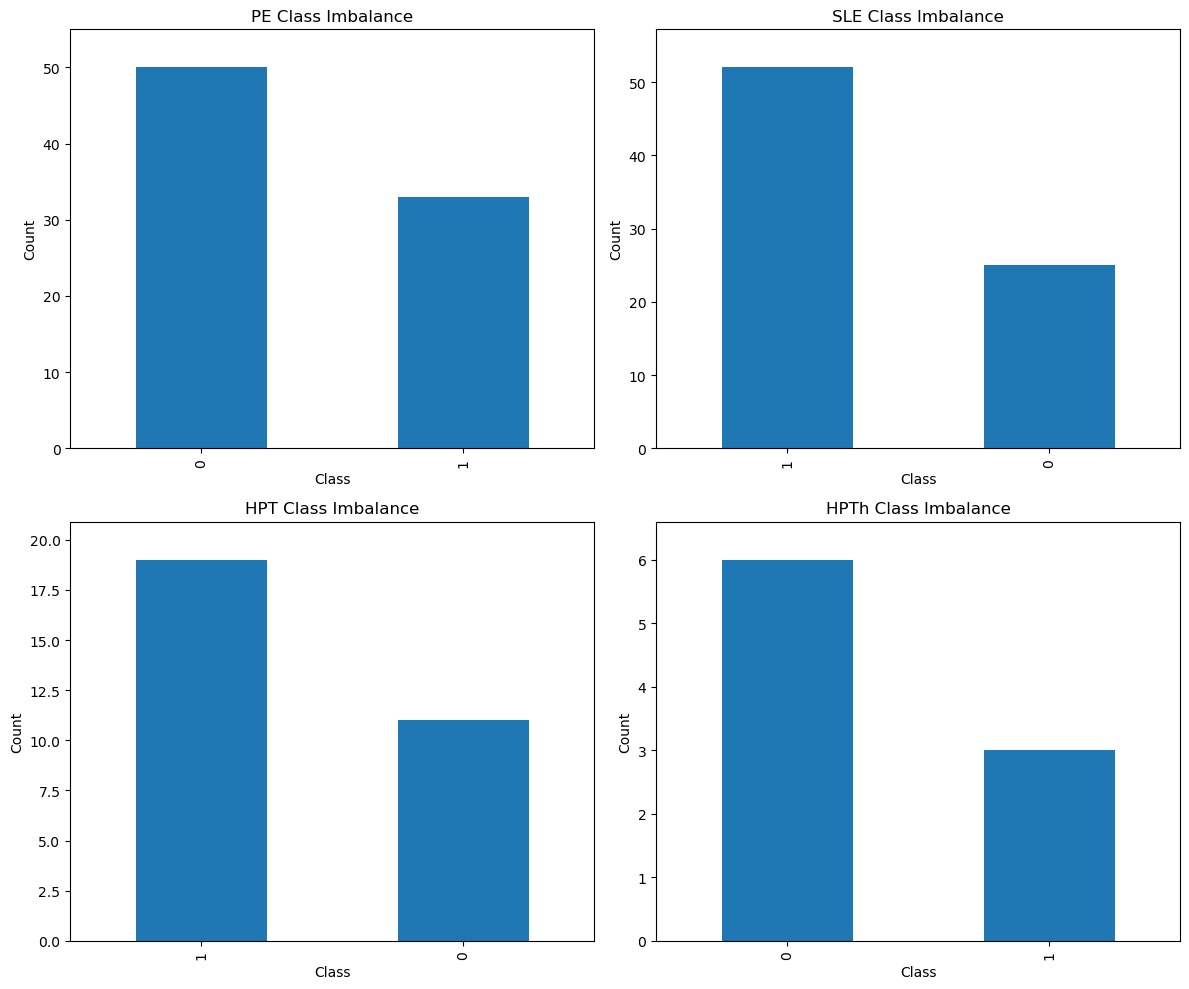

In [18]:
# Create a dictionary for easier iteration
class_counts_dict = {
    "PE": pe_class_counts,
    "SLE": sle_class_counts,
    "HPT": hpt_class_counts,
    "HPTh": hpth_class_counts
}

# Create subplots (2x2 grid)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for ax, (name, counts) in zip(axs, class_counts_dict.items()):
    counts.plot(kind="bar", ax=ax)
    ax.set_title(f"{name} Class Imbalance")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.set_ylim(0, counts.max() * 1.1)

plt.tight_layout()
plt.show()

### **9. Scale Features**
Description: Standardize the gene expression features to have a mean of 0 and variance of 1.
- **StandardScaler**: Used to transform the data, ensuring all features contribute equally to the model and preventing dominance by features with larger scales.
- Scaled feature shapes are printed to confirm consistency with the original data.

In [19]:
# Scale the features
def scale_features(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled
pe_X_scaled = scale_features(pe_X)
sle_X_scaled = scale_features(sle_X)
hpt_X_scaled = scale_features(hpt_X)
hpth_X_scaled = scale_features(hpth_X)
# Print the shapes of the scaled datasets
print("PE X scaled shape:", pe_X_scaled.shape)
print("SLE X scaled shape:", sle_X_scaled.shape)
print("HPT X scaled shape:", hpt_X_scaled.shape)
print("HPTh X scaled shape:", hpth_X_scaled.shape)

PE X scaled shape: (83, 35413)
SLE X scaled shape: (77, 28089)
HPT X scaled shape: (30, 35413)
HPTh X scaled shape: (9, 28125)


### **10. Train-Test Split**
Description: Divide each dataset into training and testing sets to evaluate model performance.
- **Split**: 80% of data for training, 20% for testing (test_size=0.2).
- **random_state=42**: Ensures reproducibility of the split.
- Shapes of training and testing sets are printed for verification.

In [20]:
# Train-test split
def train_test_split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test
pe_X_train, pe_X_test, pe_y_train, pe_y_test = train_test_split_data(pe_X_scaled, pe_y)
sle_X_train, sle_X_test, sle_y_train, sle_y_test = train_test_split_data(sle_X_scaled, sle_y)
hpt_X_train, hpt_X_test, hpt_y_train, hpt_y_test = train_test_split_data(hpt_X_scaled, hpt_y)
hpth_X_train, hpth_X_test, hpth_y_train, hpth_y_test = train_test_split_data(hpth_X_scaled, hpth_y)
# Print the shapes of the train-test split datasets
print("PE X_train shape:", pe_X_train.shape)
print("PE X_test shape:", pe_X_test.shape)
print("PE y_train shape:", pe_y_train.shape)
print("PE y_test shape:", pe_y_test.shape)
print("SLE X_train shape:", sle_X_train.shape)
print("SLE X_test shape:", sle_X_test.shape)
print("SLE y_train shape:", sle_y_train.shape)
print("SLE y_test shape:", sle_y_test.shape)
print("HPT X_train shape:", hpt_X_train.shape)
print("HPT X_test shape:", hpt_X_test.shape)
print("HPT y_train shape:", hpt_y_train.shape)
print("HPT y_test shape:", hpt_y_test.shape)
print("HPTh X_train shape:", hpth_X_train.shape)
print("HPTh X_test shape:", hpth_X_test.shape)
print("HPTh y_train shape:", hpth_y_train.shape)
print("HPTh y_test shape:", hpth_y_test.shape)

PE X_train shape: (66, 35413)
PE X_test shape: (17, 35413)
PE y_train shape: (66,)
PE y_test shape: (17,)
SLE X_train shape: (61, 28089)
SLE X_test shape: (16, 28089)
SLE y_train shape: (61,)
SLE y_test shape: (16,)
HPT X_train shape: (24, 35413)
HPT X_test shape: (6, 35413)
HPT y_train shape: (24,)
HPT y_test shape: (6,)
HPTh X_train shape: (7, 28125)
HPTh X_test shape: (2, 28125)
HPTh y_train shape: (7,)
HPTh y_test shape: (2,)


### **11. Train Random Forest Classifier**
Description: Train a Random Forest Classifier on the training data to predict disease states.
- **Random Forest**: An ensemble method that builds multiple decision trees and aggregates their predictions.
- **random_state=42**: Ensures consistent results across runs.
- A separate model is trained for each disease (PE, SLE, HPT, HPTh).

In [21]:
# Train Random Forest Classifier
def train_random_forest(X_train, y_train):
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    return rf
pe_rf = train_random_forest(pe_X_train, pe_y_train)
sle_rf = train_random_forest(sle_X_train, sle_y_train)
hpt_rf = train_random_forest(hpt_X_train, hpt_y_train)
hpth_rf = train_random_forest(hpth_X_train, hpth_y_train)


### **12. Evaluate Models**
Description: Assess model performance on the test set using accuracy and detailed metrics.
- **Accuracy**: Measures the proportion of correct predictions.
- **Classification Report**: Provides precision, recall, and F1-score for a comprehensive evaluation.
- **Warnings**: Filtered to avoid unnecessary output during evaluation.
- Results are printed for each disease model.

In [22]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


# Evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report
pe_accuracy, pe_report = evaluate_model(pe_rf, pe_X_test, pe_y_test)
sle_accuracy, sle_report = evaluate_model(sle_rf, sle_X_test, sle_y_test)
hpt_accuracy, hpt_report = evaluate_model(hpt_rf, hpt_X_test, hpt_y_test)
hpth_accuracy, hpth_report = evaluate_model(hpth_rf, hpth_X_test, hpth_y_test)
# Print the evaluation results
print("PE Model Evaluation:")
print("PE Accuracy:", pe_accuracy)
print("PE Classification Report:\n", pe_report)
print("SLE Model Evaluation:")
print("SLE Accuracy:", sle_accuracy)
print("SLE Classification Report:\n", sle_report)
print("HPT Model Evaluation:")
print("HPT Accuracy:", hpt_accuracy)
print("HPT Classification Report:\n", hpt_report)
print("HPTh Model Evaluation:")
print("HPTh Accuracy:", hpth_accuracy)
print("HPTh Classification Report:\n", hpth_report)

PE Model Evaluation:
PE Accuracy: 0.7058823529411765
PE Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.50      0.60      0.55         5

    accuracy                           0.71        17
   macro avg       0.66      0.68      0.66        17
weighted avg       0.72      0.71      0.71        17

SLE Model Evaluation:
SLE Accuracy: 1.0
SLE Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

HPT Model Evaluation:
HPT Accuracy: 1.0
HPT Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.

### **13. Cross-Validation**
Description: Perform 5-fold cross-validation to evaluate model robustness and generalizability.
- **Process**: The dataset is split into 5 parts; the model trains on 4 and tests on 1, repeating for all combinations.
- **Mean Score**: Provides a reliable estimate of performance across different data subsets.
- Cross-validation scores are printed as the mean for each disease.

In [23]:
# Cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    return scores
pe_cv_scores = cross_validate_model(pe_rf, pe_X_scaled, pe_y)
sle_cv_scores = cross_validate_model(sle_rf, sle_X_scaled, sle_y)
hpt_cv_scores = cross_validate_model(hpt_rf, hpt_X_scaled, hpt_y)
hpth_cv_scores = cross_validate_model(hpth_rf, hpth_X_scaled, hpth_y)
# Print the cross-validation scores
print("PE Cross-validation scores:", pe_cv_scores.mean())
print("SLE Cross-validation scores:", sle_cv_scores.mean())
print("HPT Cross-validation scores:", hpt_cv_scores.mean())
print("HPTh Cross-validation scores:", hpth_cv_scores.mean())

PE Cross-validation scores: 0.7691176470588236
SLE Cross-validation scores: 0.8950000000000001
HPT Cross-validation scores: 0.9333333333333333
HPTh Cross-validation scores: 0.8


### **14. Visualize Model Metrics**
Description: Create a bar plot to compare performance metrics (accuracy, precision, recall, F1-score) across all disease models.
- **Metrics**: Computed for each disease using the test set predictions.
- **Visualization**: A grouped bar plot displays the metrics, aiding in understanding model strengths and weaknesses.
- Axes are labeled, and a grid is added for clarity.

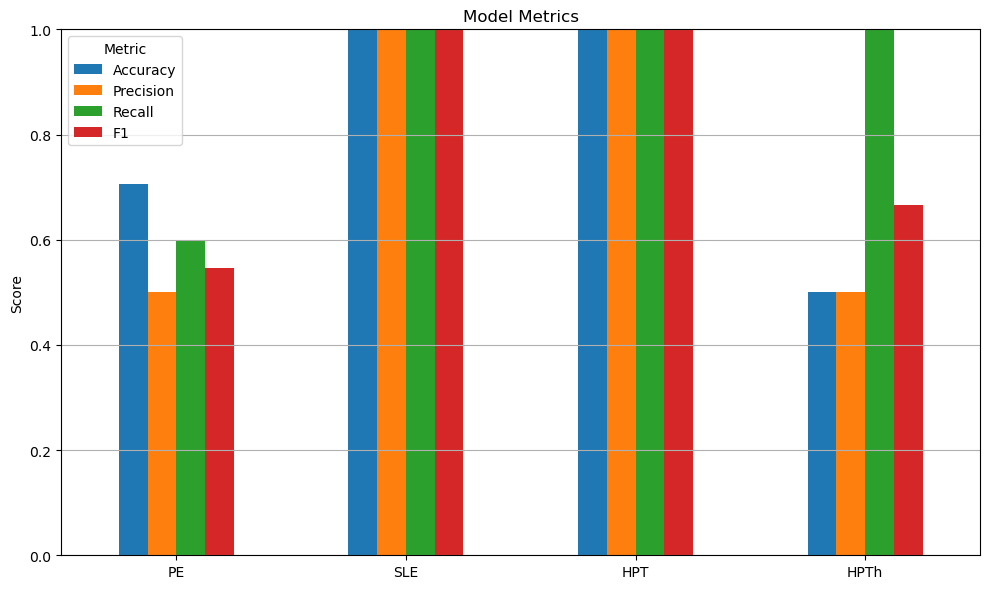

In [24]:
# Define a dictionary for the datasets (test sets and models)
datasets = {
    "PE": (pe_rf, pe_X_test, pe_y_test),
    "SLE": (sle_rf, sle_X_test, sle_y_test),
    "HPT": (hpt_rf, hpt_X_test, hpt_y_test),
    "HPTh": (hpth_rf, hpth_X_test, hpth_y_test)
}

# Compute metrics for each dataset
metrics = {}
for name, (model, X_test, y_test) in datasets.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    metrics[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics).T

# Plot the metrics as a grouped barplot
ax = metrics_df.plot(kind="bar", figsize=(10,6))
ax.set_ylim(0, 1)
plt.title("Model Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(title="Metric")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### **15. Extract Feature Importances**
Description: Identify the most influential genes (features) in the Random Forest models for each disease.
- **Feature Importance**: Scores indicate each gene's contribution to the classification.
- **Filtering**: Only genes with non-zero importance are retained.
- Results are printed, including the total number of important features for each disease.

In [25]:
# Feature importances with non-zero values in series
def get_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_importances = pd.Series(importances[indices], index=feature_names[indices])
    return feature_importances[feature_importances > 0]
pe_feature_importances = get_feature_importances(pe_rf, pe_X.columns)
sle_feature_importances = get_feature_importances(sle_rf, sle_X.columns)
hpt_feature_importances = get_feature_importances(hpt_rf, hpt_X.columns)
hpth_feature_importances = get_feature_importances(hpth_rf, hpth_X.columns)
# Print the feature importances
print("PE Feature Importances:\n", pe_feature_importances)
print("Total Number of Features for PE:", len(pe_feature_importances))
print("SLE Feature Importances:\n", sle_feature_importances)
print("Total Number of Features for SLE:", len(sle_feature_importances))
print("HPT Feature Importances:\n", hpt_feature_importances)
print("Total Number of Features for HPT:", len(hpt_feature_importances))
print("HPTh Feature Importances:\n", hpth_feature_importances)
print("Total Number of Features for HPTh:", len(hpth_feature_importances))


PE Feature Importances:
 S100A10      0.013368
FMO5         0.012978
PTPRR        0.012074
MYLK3        0.012008
GXYLT1P4     0.010135
               ...   
WIPF3        0.000341
F2           0.000325
CBARP        0.000304
RN7SL685P    0.000286
HIF1AN       0.000285
Length: 426, dtype: float64
Total Number of Features for PE: 426
SLE Feature Importances:
 BTG1            0.027820
ARRDC3          0.016707
GAS2L1          0.016026
NFKBIA          0.015937
LOC102723692    0.015729
                  ...   
GOLGA1          0.000558
PROX2           0.000545
ITIH6           0.000525
NLN             0.000394
SNORA68         0.000376
Length: 250, dtype: float64
Total Number of Features for SLE: 250
HPT Feature Importances:
 LUM       0.021600
OGN       0.020000
S1PR4     0.020000
PDHB      0.010000
PTGFR     0.010000
            ...   
EIF1AX    0.001538
MS4A2     0.001538
LIMA1     0.001538
ID3       0.001538
SCARF1    0.001538
Length: 136, dtype: float64
Total Number of Features for HPT: 136


### **16. Identify Common Biomarkers**
Description: Find genes that are important across multiple disease models by intersecting their important features.
- **Pairwise Intersection**: Identifies common biomarkers between pairs of diseases (e.g., PE and SLE, PE and HPT).
- **All-Disease Intersection**: Identifies biomarkers common to PE, SLE, HPT, and HPTh.
- Results are printed as lists of common genes and their counts, suggesting potential shared biological mechanisms.

In [26]:
# Common biomarkers between PE and SLE
def get_common_biomarkers(pe_importances, sle_importances):
    common_biomarkers = pe_importances.index.intersection(sle_importances.index)
    return common_biomarkers
pe_sle_common_biomarkers = get_common_biomarkers(pe_feature_importances, sle_feature_importances)
print("Common Biomarkers between PE and SLE:\n", list(pe_sle_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between PE and SLE:", len(pe_sle_common_biomarkers))

Common Biomarkers between PE and SLE:
 ['S100A10', 'CTTN', 'KIF11', 'IL6ST', 'LINC-PINT', 'CSNK2B', 'GFRA3', 'HERPUD1', 'DXO']
Number of Common Biomarkers between PE and SLE: 9


In [27]:
# Common biomarkers between PE and HPT
pe_hpt_common_biomarkers = get_common_biomarkers(pe_feature_importances, hpt_feature_importances)
print("Common Biomarkers between PE and HPT:\n", list(pe_hpt_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between PE and HPT:", len(pe_hpt_common_biomarkers))

Common Biomarkers between PE and HPT:
 ['MFAP5', 'TRAM2-AS1', 'BTNL9', 'IKZF3']
Number of Common Biomarkers between PE and HPT: 4


In [28]:
# Common biomarkers between PE and HPTh
pe_hpth_common_biomarkers = get_common_biomarkers(pe_feature_importances, hpth_feature_importances)
print("Common Biomarkers between PE and HPTh:\n", list(pe_hpth_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between PE and HPTh:", len(pe_hpth_common_biomarkers))

Common Biomarkers between PE and HPTh:
 []
Number of Common Biomarkers between PE and HPTh: 0


In [29]:
# Common biomarkers between SLE and HPT
sle_hpt_common_biomarkers = get_common_biomarkers(sle_feature_importances, hpt_feature_importances)
print("Common Biomarkers between SLE and HPT:\n", list(sle_hpt_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between SLE and HPT:", len(sle_hpt_common_biomarkers))

Common Biomarkers between SLE and HPT:
 ['TAGAP', 'CTSO']
Number of Common Biomarkers between SLE and HPT: 2


In [30]:
# Common biomarkers between SLE and HPTh
sle_hpth_common_biomarkers = get_common_biomarkers(sle_feature_importances, hpth_feature_importances)
print("Common Biomarkers between SLE and HPTh:\n", list(sle_hpth_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between SLE and HPTh:", len(sle_hpth_common_biomarkers))

Common Biomarkers between SLE and HPTh:
 ['PSMB8-AS1']
Number of Common Biomarkers between SLE and HPTh: 1


In [31]:
# Common biomarkers between HPT and HPTh
hpt_hpth_common_biomarkers = get_common_biomarkers(hpt_feature_importances, hpth_feature_importances)
print("Common Biomarkers between HPT and HPTh:\n", list(hpt_hpth_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between HPT and HPTh:", len(hpt_hpth_common_biomarkers))

Common Biomarkers between HPT and HPTh:
 ['AOC3', 'HRH1']
Number of Common Biomarkers between HPT and HPTh: 2


In [32]:
# Common biomarkers between PE, SLE, HPT, and HPTh
def get_common_biomarkers_all(pe_importances, sle_importances, hpt_importances, hpth_importances):
    common_biomarkers = pe_importances.index.intersection(sle_importances.index).intersection(hpt_importances.index).intersection(hpth_importances.index)
    return common_biomarkers
pe_sle_hpt_hpth_common_biomarkers = get_common_biomarkers_all(pe_feature_importances, sle_feature_importances, hpt_feature_importances, hpth_feature_importances)
print("Common Biomarkers between PE, SLE, HPT, and HPTh:\n", list(pe_sle_hpt_hpth_common_biomarkers))
# Print the number of common biomarkers
print("Number of Common Biomarkers between PE, SLE, HPT, and HPTh:", len(pe_sle_hpt_hpth_common_biomarkers))

Common Biomarkers between PE, SLE, HPT, and HPTh:
 []
Number of Common Biomarkers between PE, SLE, HPT, and HPTh: 0
